<a href="https://colab.research.google.com/github/soundariyae/sustainable-farming-smart-irrigation-system/blob/main/smart_irrigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Smart Irrigation System: Naive Bayes Approach

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Import data

In [2]:
df = pd.read_csv('data.csv')
df.sample(10)

,crop,moisture,temp,pump
167,cotton,1001,36,1
42,cotton,700,38,1
187,cotton,974,28,1
155,cotton,1020,27,1
27,cotton,714,14,1
37,cotton,687,11,1
90,cotton,850,16,1
53,cotton,612,31,1
84,cotton,579,45,1
36,cotton,665,32,1


# Data Preprocessing

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
crop        0
moisture    0
temp        0
pump        0
dtype: int64


In [5]:
# Encode the 'crop' column if it's categorical
if df['crop'].dtype == 'object':
    df['crop'] = df['crop'].astype('category').cat.codes

In [6]:
df

,crop,moisture,temp,pump
0,0,638,16,1
1,0,522,18,1
2,0,741,22,1
3,0,798,32,1
4,0,690,28,1
...,...,...,...,...
195,0,941,13,1
196,0,902,45,1
197,0,894,42,1
198,0,1022,45,1


In [7]:
# Define the feature set (X) and target variable (y)
X = df.drop(columns=['pump'])
y = df['pump']

In [8]:
X

,crop,moisture,temp
0,0,638,16
1,0,522,18
2,0,741,22
3,0,798,32
4,0,690,28
...,...,...,...
195,0,941,13
196,0,902,45
197,0,894,42
198,0,1022,45


In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Model

In [10]:
# Train the Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

# Predictions

In [11]:
# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluation

In [12]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


Confusion Matrix:
[[ 7  2]
 [ 0 31]]


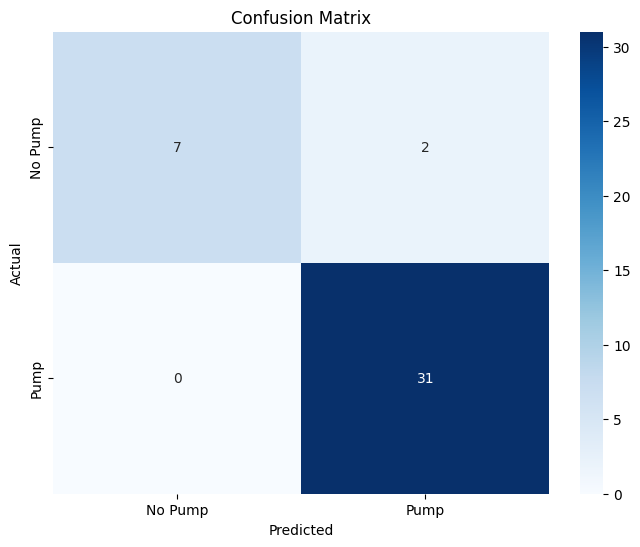

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Pump', 'Pump'], yticklabels=['No Pump', 'Pump'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.94      1.00      0.97        31

    accuracy                           0.95        40
   macro avg       0.97      0.89      0.92        40
weighted avg       0.95      0.95      0.95        40



# Test

In [15]:
# Example prediction
example_data = X_test.iloc[0].values.reshape(1, -1)  # Take the first sample from the test set
example_prediction = nb_model.predict(example_data)
print(f"Prediction for example data (0 = No Pump, 1 = Pump): {example_prediction[0]}")

Prediction for example data (0 = No Pump, 1 = Pump): 1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
